<a href="https://colab.research.google.com/github/StMaCre/Sentiment_analysis/blob/main/Descarga_y_exploraci%C3%B3n_del_corpus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descarga y exploración del corpus

In [ ]:
# Import all the libraries 
import pandas as pd 
import numpy as np 
import gzip
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import string


In [ ]:
# import the JSON file into a dataframe after opening the gzipped file
with gzip.open('/content/Video_Games.json.gz', 'rb') as f:
  df = pd.read_json(f, lines=True)

# Randomly choose 20 000 entries
alea_df = df.sample(n=20000)

# Export the sampled dataframe to a new CSV file for easier access for the next iteration
alea_df.to_csv('sampled_data_file.csv', index=False)

In [ ]:
df = pd.read_csv('/content/sampled_data_file.csv')

In [ ]:
# Checking the first rows
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,2,True,"05 28, 2015",A4VSYTVNZPQLU,B00KWG4HG0,Mic,Enjoyable mini games and slick graphics. Howe...,Mario Party Junkie Disappointed with Watered D...,1432771200,13.0,"{'Edition:': ' Standard', 'Platform:': ' Ninte...",NaN
1,4,False,"06 20, 2012",A3J8ABVGK7ZL6H,B00004SVON,Ishmael,"Let me just first start off by saying,I am a H...",Good Underrated NES Game,1340150400,NaN,NaN,NaN
2,5,True,"12 2, 2016",A2Y8VOLGBJJH17,B014G02N4K,The one who reviews,Very fun and enjoyable game everything I thoug...,Nice little gem of a game,1480636800,NaN,NaN,NaN
3,1,True,"01 20, 2017",A33G0X2NXOGTRL,B0090XWUD8,Jason Cho,there are frame stutters every 5 seconds cant ...,One Star,1484870400,NaN,NaN,NaN
4,5,False,"09 25, 2012",A3PYYISUSVOKUB,B005T5OBWY,Matt,I bought this game for my sister and little co...,Fantastic game and Hours of fun!,1348531200,NaN,NaN,NaN


#Cardinalidad del vocabulario

In [ ]:
# Create a df with only the reviews
text_df = df['reviewText']

# Tokenization of the text 
nltk.download('punkt')

palabras = []
for review in text_df:
    palabras.extend(nltk.word_tokenize(review.lower()))


# Count the frequency of each word 
frecuencia_palabra = {}

for palabra in palabras:
    if palabra not in frecuencia_palabra:
        frecuencia_palabra[palabra] = 1
    else:
        frecuencia_palabra[palabra] += 1

# Sorting the dictionary by frequency
palabras_clasificadas = sorted(frecuencia_palabra.items(), key=lambda x: x[1], reverse=True)

# Calculate the vocabulary cardinality
cardinalidad = len(frecuencia_palabra)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(cardinalidad)

37579


The number of unique words in our corpus is 37 579. 

In [ ]:
# Sorting the dictionary by frequency
palabras_clasificadas = sorted(frecuencia_palabra.items(), key=lambda x: x[1], reverse=True)

# Top 20 most frequent words 
for word, freq in palabras_clasificadas[:20]:
    print(f"{word}: {freq}")

.: 80423
the: 77945
,: 55106
and: 40563
i: 39096
to: 38059
a: 35787
it: 34838
is: 26223
of: 24854
you: 23124
game: 22716
this: 21499
for: 17349
that: 15602
in: 15570
but: 12083
with: 11787
on: 10963
have: 10938


In [ ]:
# Getting rid of the stopwords and punctuation in the list
nltk.download('stopwords')
stopwords = stopwords.words('english')
pontuación = ['.', ',', '!', '(', ')', "''", ':', "``", '...']

palabras_sin_stopwords =  [(palabra, num) for (palabra, num) in palabras_clasificadas if palabra.lower() not in stopwords]
palabras_sin_pontuación = [(palabra, num) for (palabra,num) in palabras_sin_stopwords if palabra.lower() not in pontuación]

# Top 20 most frequent words 
for word, freq in palabras_sin_pontuación[:20]:
    print(f"{word}: {freq}")

game: 22716
n't: 10770
's: 9094
like: 6522
great: 6240
one: 6129
games: 5159
play: 5094
good: 4976
get: 4882
would: 4133
really: 3789
fun: 3740
time: 3663
even: 3042
much: 3001
well: 2997
also: 2717
new: 2621
first: 2600


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Distribución de reviews por número de estrellas

In [ ]:
# get the distribution of reviews for each star
review_counts = df['overall'].value_counts()
print(review_counts)

5    11606
4     3219
1     2389
3     1628
2     1158
Name: overall, dtype: int64


Text(0, 0.5, 'Número de reviews')

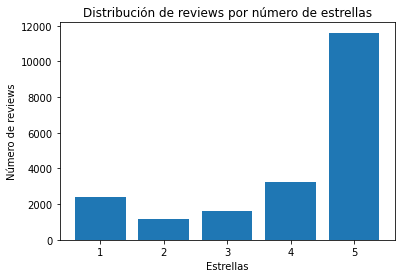

In [ ]:
# Visualization of the distribution
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(review_counts.index, review_counts.values)

# set the chart title and axis labels
ax.set_title('Distribución de reviews por número de estrellas')
ax.set_xlabel('Estrellas')
ax.set_ylabel('Número de reviews')

# Nº de reviews positivas y negativas

In [ ]:
# We will consider 1 to 2 to be bad reviews and 4 to 5 to be good 
# count the number of positive and negative reviews
positivas = (df['overall'] >= 4).sum()
negativas = (df['overall'] <= 2).sum()

# print the results
print(f"Nº de reviews positivas: {positivas}")
print(f"Nº de reviews negativas: {negativas}")

Nº de reviews positivas: 14825
Nº de reviews negativas: 3547


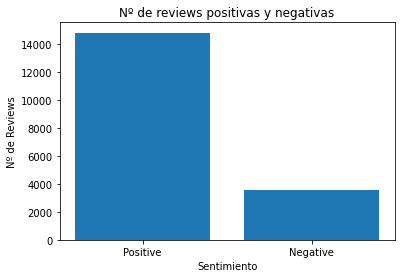

In [ ]:
# Visualization
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(['Positive', 'Negative'], [positivas, negativas])

# set the chart title and axis labels
ax.set_title('Nº de reviews positivas y negativas')
ax.set_xlabel('Sentimiento')
ax.set_ylabel('Nº de Reviews')

# display the chart
plt.show()

# Nubes de palabras

In [ ]:
# concatenate all the reviews into a single string
text = ' '.join(df['reviewText'].fillna('').values)

# create a WordCloud object and generate the word cloud
nubes = WordCloud(width=800, height=800, background_color='white').generate(text)

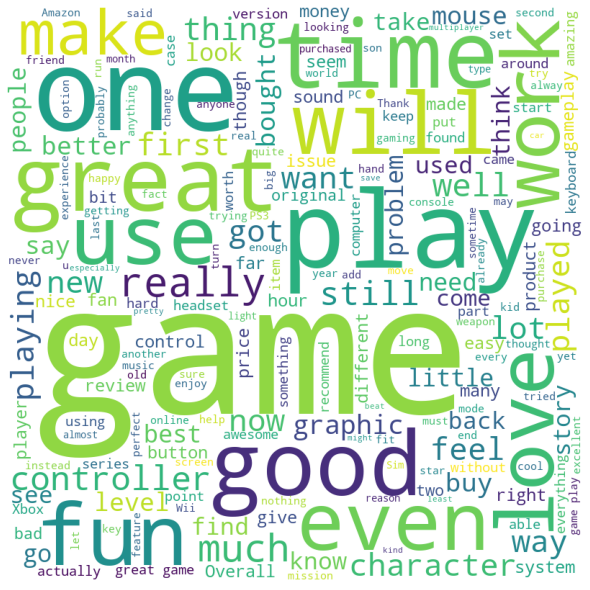

In [ ]:
# Plot the wordcloud
fig = plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(nubes)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Word2Vec

In [ ]:
# Visualización en 2 dimensiones de algunos word embeddings calculados con
# Word2Vec (elegir 4-5 palabras y pintar las top 10 más similares)

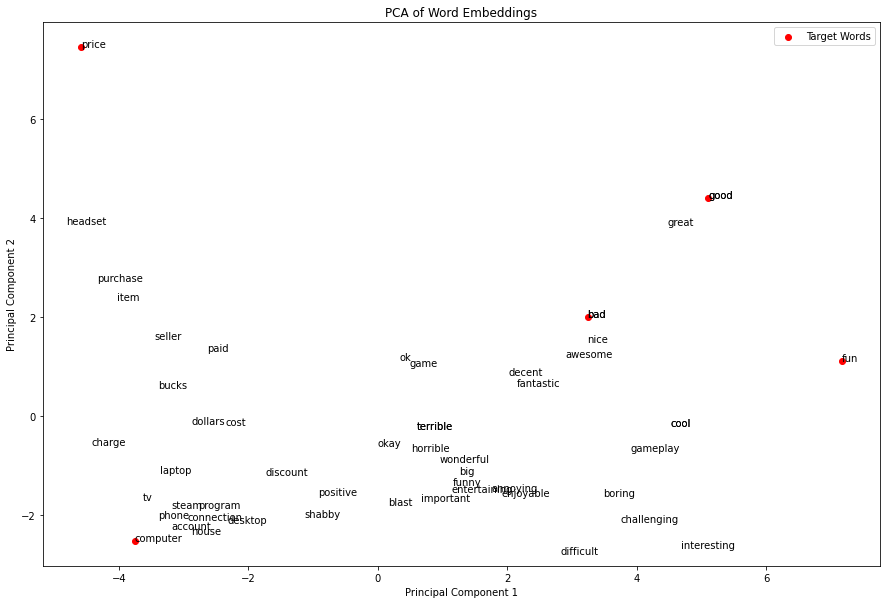

In [ ]:
# concatenate all the reviews into a list of sentences
frases = [str(review).lower().split() for review in df['reviewText'].fillna('').values]
frases_clean = []
for frase in frases:
    # Remove punctuation
    frase_no_punct = [word.translate(str.maketrans('', '', string.punctuation)) for word in frase]
    frases_clean.append(frase_no_punct)

# train a Word2Vec model on the sentences
model = Word2Vec(frases_clean, size=100, window=5, min_count=5, workers=4)

# choose 5 target words
palabra_ob = ['good', 'bad', 'price', 'computer', 'fun']

# compute the top 10 most similar words for each target word
similares = {}
for target in palabra_ob:
    similares[target] = [word for word, _ in model.wv.most_similar(target, topn=10)]

# compute the PCA of the word embeddings for the target words and their similar words
words = palabra_ob + [word for words in similares.values() for word in words]
embeddings = model.wv[words]
pca = PCA(n_components=2)
principal_components = pca.fit_transform(embeddings)

# plot the PCA of the word embeddings
fig, ax = plt.subplots()
ax.scatter(principal_components[:5, 0], principal_components[:5, 1], color='red', label='Target Words')
for i, target in enumerate(palabra_ob):
    ax.annotate(target, (principal_components[i, 0], principal_components[i, 1]))
for i, word in enumerate(words[5:]):
    ax.annotate(word, (principal_components[i+5, 0], principal_components[i+5, 1]))
fig.set_figheight(10)
fig.set_figwidth(15)
ax.set_title('PCA of Word Embeddings')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.legend()

# display the plot
plt.show()

In [ ]:
model.wv.most_similar('bad', topn=10)

[('good', 0.7056947946548462),
 ('okay', 0.65196293592453),
 ('big', 0.6313623189926147),
 ('ok', 0.6252426505088806),
 ('terrible', 0.6213633418083191),
 ('positive', 0.5802743434906006),
 ('important', 0.577571451663971),
 ('shabby', 0.576499342918396),
 ('cool', 0.5718514323234558),
 ('annoying', 0.5691735744476318)]

In [ ]:
model.wv.most_similar('computer', topn=10)

[('phone', 0.8235027194023132),
 ('laptop', 0.7938604354858398),
 ('desktop', 0.7053917646408081),
 ('connection', 0.7018320560455322),
 ('account', 0.701635479927063),
 ('steam', 0.6972076892852783),
 ('charge', 0.6840749979019165),
 ('program', 0.6805732250213623),
 ('house', 0.6804710626602173),
 ('tv', 0.6787561178207397)]

In [ ]:
model.wv.most_similar('price', topn=10)

[('bucks', 0.6709352731704712),
 ('product', 0.6608047485351562),
 ('paid', 0.6589016914367676),
 ('discount', 0.6578375697135925),
 ('cost', 0.6515157222747803),
 ('purchase', 0.6439559459686279),
 ('item', 0.6430003643035889),
 ('headset', 0.6393351554870605),
 ('dollars', 0.6359466314315796),
 ('seller', 0.6359272599220276)]

In [ ]:
model.wv.most_similar('good', topn=10)

[('great', 0.7961976528167725),
 ('decent', 0.7863115668296814),
 ('cool', 0.73958420753479),
 ('bad', 0.7056947946548462),
 ('nice', 0.6898255348205566),
 ('fantastic', 0.6581826210021973),
 ('terrible', 0.6534855365753174),
 ('awesome', 0.6468636989593506),
 ('horrible', 0.6431154608726501),
 ('wonderful', 0.6297913193702698)]

In [ ]:
model.wv.most_similar('fun', topn=10)

[('challenging', 0.6673516035079956),
 ('enjoyable', 0.6472976207733154),
 ('boring', 0.6370837688446045),
 ('blast', 0.6286582946777344),
 ('entertaining', 0.6253530979156494),
 ('interesting', 0.5885855555534363),
 ('gameplay', 0.5742655992507935),
 ('game', 0.5712252855300903),
 ('funny', 0.5648696422576904),
 ('difficult', 0.5602871775627136)]

# Conclusiones de la exploración

After analyzing a corpus of 20,000 video game reviews from Amazon, I found that the most common words used are "game", "like", "great", "one", "games", "play", "good", "get", "would", "really", "fun", "time", "even", "much", "well", "also", "new", and "first". 

The number of unique words in the corpus is 37,579.

When examining the distribution of the number of stars for a review, I found that the majority of reviews received 5 stars (11606), followed by 4 stars (3219), 1 star (2389), and 3 stars (1628).

In terms of word similarity using Word2Vec, I found that the word "good" is most similar to "great", "decent", and "cool", while the word "bad" is most similar to "good", "okay", and "big". Interestingly, the word "fun" is most similar to "challenging", "enjoyable", and "blast".

Overall, these findings suggest that the majority of reviewers are generally positive about their experiences with video games. The most common words used in their reviews reflect this positivity, with words like "great" and "fun" appearing frequently. The results of the Word2Vec analysis suggest that some words that might be considered opposites, such as "good" and "bad", are actually used in similar contexts in these reviews. This could be due to the subjective nature of reviews, where a "bad" experience for one person may not necessarily be the same for another.